# Analyzing the community activity for version control systems

## Exercise

### Background

Technology choices are different. There may be objective reasons for technology at a specific time. But those reasons often change over time. But the developed deep love for an now outdated technology can prevent every progress. Thus objective reasons may become subjective which can create a toxic environment when technology updates are addressed.

### Your task

You are a new team member in a software company. The developers there are using a version control system ("VCS" for short) called CVS (Concurrent Versions System). Some want to migrate to a better VCS. They prefer one that's called SVN (Subversion). You are young but not inexperienced. You heard about newer version control system named "Git". So you propose Git as an alternative to the team. They are very sceptical about your suggestion. Find evidence that shows that the software development community is mainly adopting the Git version control system!

### The dataset

There is a dataset from the online software developer community Stack Overflow in `../datasets/stackoverflow_vcs_data_subset.gz` (with a subset of columns) available with the following data:

* `CreationDate`: the timestamp of the creation date of a Stack Overflow post (= question)
* `TagName`: the tag name for a technology (in our case for only 4 VCSes: "cvs", "svn", "git" and "mercurial")
* `ViewCount`: the numbers of views of a post



## Your solution

### Step 1: Load in the dataset

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
import pandas as pd

vcs_data = pd.read_csv('../datasets/stackoverflow_vcs_data_subset.gz')
vcs_data.head()

,CreationDate,TagName,ViewCount
0,2008-08-01 13:56:33,svn,10880
1,2008-08-01 14:41:24,svn,55075
2,2008-08-01 15:22:29,svn,15144
3,2008-08-01 18:00:13,svn,8010
4,2008-08-01 18:33:08,svn,92006


### Step 2: Explore the dataset by displaying the number of all posts for each VCS

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
vcs_data['TagName'].value_counts()

git          113941
svn           25977
mercurial      7946
cvs            1505
Name: TagName, dtype: int64

### Step 3: Convert the column with the time stamp

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
vcs_data['CreationDate'] = pd.to_datetime(vcs_data['CreationDate'])
vcs_data.head()

,CreationDate,TagName,ViewCount
0,2008-08-01 13:56:33,svn,10880
1,2008-08-01 14:41:24,svn,55075
2,2008-08-01 15:22:29,svn,15144
3,2008-08-01 18:00:13,svn,8010
4,2008-08-01 18:33:08,svn,92006


### Step 4: Sum up the view counts by the timestamp and the VCSes

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
number_of_posts = vcs_data.groupby(['CreationDate', 'TagName']).sum()
number_of_posts.head()

,,ViewCount
CreationDate,TagName,
2008-08-01 13:56:33,svn,10880
2008-08-01 14:41:24,svn,55075
2008-08-01 15:22:29,svn,15144
2008-08-01 18:00:13,svn,8010
2008-08-01 18:33:08,svn,92006


### Step 5: List the number of views by date for each VCS
Hint: You may unstack and fill in the data (and get rid of the hierarchical column)

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
views_per_vcs = number_of_posts.unstack(fill_value=0)['ViewCount']
views_per_vcs.head()

TagName,cvs,git,mercurial,svn
CreationDate,,,,
2008-08-01 13:56:33,0,0,0,10880
2008-08-01 14:41:24,0,0,0,55075
2008-08-01 15:22:29,0,0,0,15144
2008-08-01 18:00:13,0,0,0,8010
2008-08-01 18:33:08,0,0,0,92006


### Step 6: Accumulate the number of views for the VCSes for every month over all the years
Hint: First, you have to resample the data and summing it up

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
cumulated_posts = views_per_vcs.resample("1M").sum().cumsum()
cumulated_posts.head()

TagName,cvs,git,mercurial,svn
CreationDate,,,,
2008-08-31,165811,2502424,755846,3488439
2008-09-30,428713,15224415,891127,11405500
2008-10-31,637236,25672697,1114432,14295198
2008-11-30,752735,32492475,1184003,15848089
2008-12-31,878710,37829614,1222065,18256764


### Step 7: Visualize the number of views over time for all VCSes

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

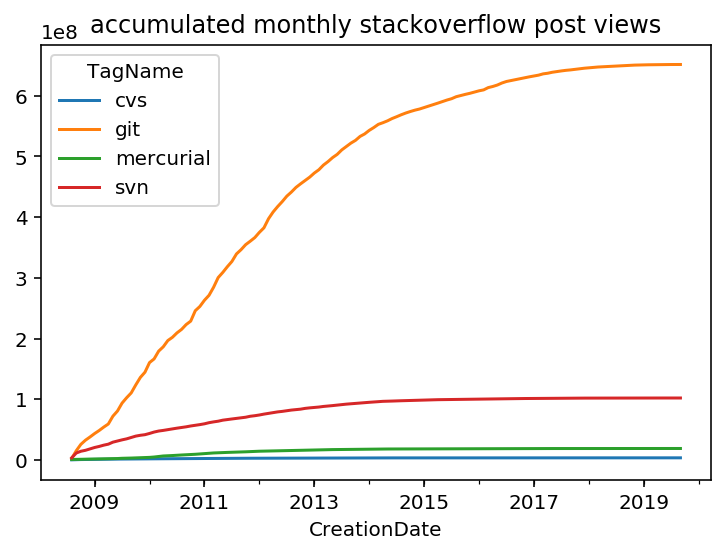

In [ ]:
%matplotlib inline
cumulated_posts.plot(title="accumulated monthly stackoverflow post views");

### Step 8: What are your conclusions? Discuss!